In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [2]:
names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

voting = pd.read_csv('data/house-votes-84.data',na_values='?',header=-1,names=names)
voting = voting.dropna()

In [3]:
voting[voting == 'y'] = 1
voting[voting == 'n'] = 0

In [4]:
voting.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [5]:
voting['party'].value_counts(normalize=True)

democrat      0.534483
republican    0.465517
Name: party, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

Kf = KFold(n_splits=3,random_state=42)

In [51]:
# Create arrays for the features and the response variable
y = voting['party'].values
X = voting.drop('party', axis=1).values

In [52]:
X_Train, X_test, y_Train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42,
                                                    stratify=y)

In [53]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [67]:
error_train, error_val = [],[]
for n in range(1,25):
    val_error, train_error = [], []
    for train_idx, val_idx in Kf.split(X=X_Train,y=y_Train):
        
        # Training set
        X_train = X_Train[train_idx,:]
        y_train = y_Train[train_idx]
        
        # Validation set
        X_val = X_Train[val_idx,:]
        y_val = y_Train[val_idx]
        
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train,y_train)
        
        pred_train = knn.predict(X_train)
        train_error.append(np.mean(pred_train != y_train))
        
        pred_val = knn.predict(X_val)
        val_error.append(np.mean(pred_val != y_val))
        
    error_train.append(np.mean(train_error))
    error_val.append(np.mean(val_error))

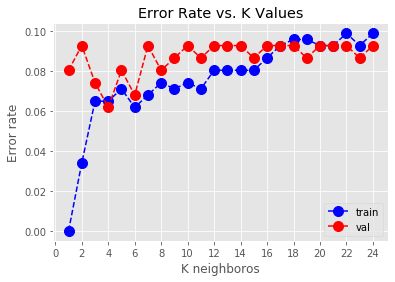

In [69]:
plt.figure()
plt.plot(list(range(1,25)),error_train,
         color='blue',linestyle='dashed',
         marker='o',markerfacecolor='blue',markersize=10,label='train')

plt.plot(list(range(1,25)),error_val,
         color='red',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10,label='val')

plt.title('Error Rate vs. K Values')
plt.xlabel('K neighboros')
plt.ylabel('Error rate')
plt.legend()
_=plt.xticks(np.arange(25)[::2])

In [70]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_Train,y_Train)
pred_test = knn.predict(X_test)
print('\n')
print('Classification report: \n', classification_report(y_test,pred_test))
print('\n')
print('Confusion matrix: \n', confusion_matrix(y_test,pred_test))
print('Accuracy: ',knn.score(X_test,y_test))



Classification report: 
               precision    recall  f1-score   support

    democrat       0.97      0.89      0.93        37
  republican       0.89      0.97      0.93        33

    accuracy                           0.93        70
   macro avg       0.93      0.93      0.93        70
weighted avg       0.93      0.93      0.93        70



Confusion matrix: 
 [[33  4]
 [ 1 32]]
Accuracy:  0.9285714285714286


## Logistinc regression

In [77]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [79]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred = logreg.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36  1]
 [ 3 30]]
              precision    recall  f1-score   support

    democrat       0.92      0.97      0.95        37
  republican       0.97      0.91      0.94        33

    accuracy                           0.94        70
   macro avg       0.95      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70



In [82]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [83]:
from sklearn.metrics import roc_curve

In [95]:
fpr, tpr, thresholds = roc_curve((y_test=='republican'),y_pred_prob)

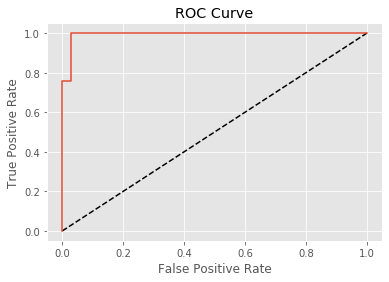

In [96]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [99]:
cv_auc = cross_val_score(logreg,X_train,y_train,cv=5,scoring='roc_auc')

/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

In [100]:
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.96581197 0.99145299 0.99145299 1.         1.        ]
